#Fit de Campo Magnético Solar usando MCMC

In [1]:
%pylab inline
import pyfits

Populating the interactive namespace from numpy and matplotlib


##Importación de datos

In [6]:
sdo = pyfits.open('hmi.m_45s.magnetogram.subregion_x1y1.fits')
time = loadtxt("time_series.csv")
data = sdo[0].data

##Fit para un pixel

In [15]:
campo = data[:,138,241]

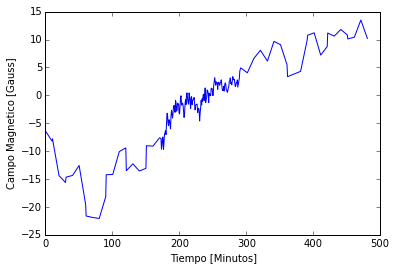

In [17]:
plot(time, campo)
xlabel("Tiempo [Minutos]")
ylabel("Campo Magnetico [Gauss]")

###Ajuste Lineal

In [97]:
def linear_likelihood(y_obs, y_model):
    chi_squared = (1.0/2.0)*sum((y_obs-y_model)**2)
    return -chi_squared

In [98]:
def linear_model(x_obs, a, b):
    return x_obs*b + a

In [99]:
a_walk = empty((0))
b_walk = empty((0))
l_walk = empty((0))

a_walk = append(a_walk, random.random())
b_walk = append(b_walk, random.random())

y_init = linear_model(time, a_walk[0], b_walk[0])
l_walk = append(l_walk, linear_likelihood(campo, y_init))
print a_walk
print b_walk
print l_walk

[ 0.68087946]
[ 0.24206691]
[-373805.48005134]


In [100]:
n_iterations = 20000
for i in range(n_iterations):
    a_prime = np.random.normal(a_walk[i], 20) 
    b_prime = np.random.normal(b_walk[i], 0.1)

    y_init = linear_model(time, a_walk[i], b_walk[i])
    y_prime = linear_model(time, a_prime, b_prime)
    
    l_prime = linear_likelihood(campo, y_prime)
    l_init = linear_likelihood(campo, y_init)
    
    alpha = l_prime/l_init
    if(alpha>=1.0):
        a_walk  = append(a_walk,a_prime)
        b_walk  = append(b_walk,b_prime)
        l_walk = append(l_walk, l_prime)
    else:
        beta = random.random()
        if(beta<=alpha):
            a_walk = append(a_walk,a_prime)
            b_walk = append(b_walk,b_prime)
            l_walk = append(l_walk, l_prime)
        else:
            a_walk = append(a_walk,a_walk[i])
            b_walk = append(b_walk,b_walk[i])
            l_walk = append(l_walk, l_init)

In [102]:
max_index = argmax(l_walk)
best_a = a_walk[max_index]
best_b = b_walk[max_index]

In [ ]:
linear_fit = gauss_model(time, best_c, best_d, best_sigma, best_mu)
plot(time, campo)
plot(time, y_fit)
xlabel("Tiempo [Minutos]")
ylabel("Campo Magnetico [Gauss]")

###Ajuste Lineal Gaussiano

In [80]:
def likelihood(y_obs, y_model):
    chi_squared = (1.0/2.0)*sum((y_obs-y_model)**2)
    return -chi_squared

In [81]:
def gauss_model(t,c, d, sigma, mu):
    return c + d*t + (1/(sigma*sqrt(2*pi)))*exp(-0.5*((t-mu)/sigma)**2)

In [82]:
c_walk = empty((0)) #this is an empty list to keep all the steps
d_walk = empty((0))
sigma_walk = empty((0))
mu_walk = empty((0))
l_walk = empty((0))

c_walk = append(c_walk, random.random())
d_walk = append(d_walk, random.random())
sigma_walk = append(sigma_walk, random.random())
mu_walk = append(mu_walk, random.random())

y_init = gauss_model(time, c_walk[0], d_walk[0], sigma_walk[0], mu_walk[0])
l_walk = append(l_walk, likelihood(campo, y_init))
print l_walk

[-1506660.23649939]


In [83]:
n_iterations = 20000
for i in range(n_iterations):
    c_prime = np.random.normal(c_walk[i], 20) 
    d_prime = np.random.normal(d_walk[i], 0.1)
    sigma_prime = np.random.normal(sigma_walk[i], 1)
    mu_prime = np.random.normal(mu_walk[i], 10)

    y_init = gauss_model(time, c_walk[i], d_walk[i], sigma_walk[i], mu_walk[i])
    y_prime = gauss_model(time, c_prime, d_prime, sigma_prime, mu_prime)
    
    l_prime = likelihood(campo, y_prime)
    l_init = likelihood(campo, y_init)
    
    alpha = l_prime-l_init
    if(alpha>=0.0):
        c_walk = append(c_walk, c_prime)
        d_walk = append(d_walk, d_prime)
        sigma_walk = append(sigma_walk, sigma_prime)
        mu_walk = append(mu_walk, mu_prime)
        l_walk = append(l_walk, l_prime)
    else:
        beta = random.random()
        if(beta<=alpha):
            c_walk = append(c_walk, c_prime)
            d_walk = append(d_walk, d_prime)
            sigma_walk = append(sigma_walk, sigma_prime)
            mu_walk = append(mu_walk, mu_prime)
            l_walk = append(l_walk, l_prime)
        else:
            c_walk = append(c_walk,c_walk[i])
            d_walk = append(d_walk,d_walk[i])
            sigma_walk = append(sigma_walk, sigma_walk[i])
            mu_walk = append(mu_walk, mu_walk[i])
            l_walk = append(l_walk, l_init)

In [84]:
max_index = argmax(l_walk)
best_c = c_walk[max_index]
best_d = d_walk[max_index]
best_sigma = sigma_walk[max_index]
best_mu = mu_walk[max_index]
print best_c, best_d, best_sigma, best_mu, l_walk[max_index]

-16.6020285058 0.0656935264492 -2.56954140844 -26.9859047742 -681.635751303


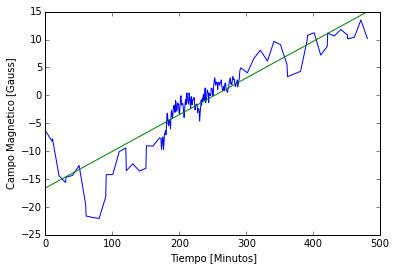

In [93]:
gauss_fit = gauss_model(time, best_c, best_d, best_sigma, best_mu)
plot(time, campo)
plot(time, y_fit)
xlabel("Tiempo [Minutos]")
ylabel("Campo Magnetico [Gauss]")

###Ajuste Paso Lineal

In [88]:
def step_model(t, f, g, h, n, t_0):
    return f + g*t + h*(1+(2/pi)*arctan(n*(t-t_0)))

In [89]:
f_walk = empty((0)) #this is an empty list to keep all the steps
g_walk = empty((0))
h_walk = empty((0))
n_walk = empty((0))
t_0_walk = empty((0))
l_walk = empty((0))

f_walk = append(f_walk, random.random())
g_walk = append(g_walk, random.random())
h_walk = append(h_walk, random.random())
n_walk = append(n_walk, random.random())
t_0_walk = append(t_0_walk, random.random())

y_init = step_model(time, f_walk[0], g_walk[0], h_walk[0], n_walk[0], t_0_walk[0])
l_walk = append(l_walk, likelihood(campo, y_init))
print l_walk

[-251750.39500402]


In [91]:
n_iterations = 20000
for i in range(n_iterations):
    f_prime = np.random.normal(f_walk[i], 20) 
    g_prime = np.random.normal(g_walk[i], 0.1)
    h_prime = np.random.normal(h_walk[i], 10)
    n_prime = np.random.normal(n_walk[i], 10)
    t_0_prime = np.random.normal(n_walk[i], 10)

    y_init = step_model(time, f_walk[i], g_walk[i], h_walk[i], n_walk[i], t_0_walk[i])
    y_prime = step_model(time, f_prime, g_prime, h_prime, n_prime, t_0_prime)
    
    l_prime = likelihood(campo, y_prime)
    l_init = likelihood(campo, y_init)
    
    alpha = l_prime-l_init
    if(alpha>=0.0):
        f_walk = append(f_walk, f_prime)
        g_walk = append(g_walk, g_prime)
        h_walk = append(h_walk, h_prime)
        n_walk = append(n_walk, n_prime)
        t_0_walk = append(t_0_walk, t_0_prime)
        l_walk = append(l_walk, l_prime)
    else:
        beta = random.random()
        if(beta<=alpha):
            f_walk = append(f_walk, f_prime)
            g_walk = append(g_walk, g_prime)
            h_walk = append(h_walk, h_prime)
            n_walk = append(n_walk, n_prime)
            t_0_walk = append(t_0_walk, t_0_prime)
            l_walk = append(l_walk, l_prime)
        else:
            f_walk = append(f_walk, f_walk[i])
            g_walk = append(g_walk, g_walk[i])
            h_walk = append(h_walk, h_walk[i])
            n_walk = append(n_walk, n_walk[i])
            t_0_walk = append(t_0_walk, t_0_walk[i])
            l_walk = append(l_walk, l_init)

In [92]:
max_index = argmax(l_walk)
best_f = f_walk[max_index]
best_g = g_walk[max_index]
best_h = h_walk[max_index]
best_n = n_walk[max_index]
best_t_0 = t_0_walk[max_index]
print best_f, best_g, best_h, best_n, best_t_0, l_walk[max_index]

-13.2243062502 0.0783162420719 -3.37092211135 43.4709102632 50.7073995215 -635.654620857


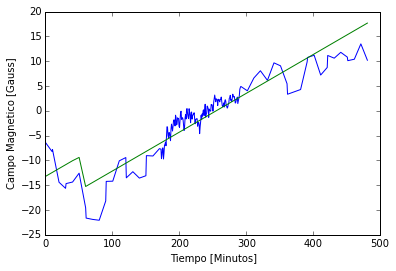

In [95]:
step_fit = step_model(time, best_f, best_g, best_h, best_n, best_t_0)
plot(time, campo)
plot(time, step_fit)
xlabel("Tiempo [Minutos]")
ylabel("Campo Magnetico [Gauss]")